# Z01.1: Prepation of Study Corpus

This notebook sets up the Study Corpus for the first Scribal Intent Study (Z01).

## Setup and Utility Functions

In [13]:
# Imports and setup
from voynichlib.Corpus import Corpus
from voynichlib.Transliteration import Transliteration
import matplotlib.pyplot as plt
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [21]:
# Custom plot 
def plot_scribes_and_topics_heatmap(data, c, label_dict, filename:None):
    # Count the number of folios for each combination of scribe and illustration
    count_data = data.groupby(['fagin_davis_scribe', 'illustration']).size().reset_index(name='count')
    
    # Creating a pivot table with swapped rows and columns
    pivot_table = count_data.pivot_table(index='illustration', columns='fagin_davis_scribe', values='count', fill_value=0)

    # Rename the row labels using the provided dictionary
    pivot_table = pivot_table.rename(index=label_dict)

    # Mask for cells with 0 value
    mask = pivot_table == 0

    def annotate_heatmap(data, ax):
        for y in range(data.shape[0]):
            for x in range(data.shape[1]):
                value = data.iloc[y, x]
                if value > 0:  # Annotate only if value is greater than 0
                    # Set font color to white if the value is over 90, otherwise black
                    font_color = 'white' if value > 90 else 'black'
                    plt.text(x + 0.5, y + 0.5, f'{int(value)}', 
                             horizontalalignment='center', 
                             verticalalignment='center', 
                             color=font_color,
                            fontsize=12)

    plt.figure(figsize=(4, 4))  # Adjusted figure size for better visibility of labels
    # Plotting the heatmap with the mask and line settings
    sns.heatmap(pivot_table, cmap=c, fmt="d", cbar=False, mask=mask, linecolor='black', linewidths=0.1)
    
    # Annotating the heatmap using the custom function
    annotate_heatmap(pivot_table, plt.gca())

    plt.xticks(rotation=0)  # Rotate column labels to horizontal
    plt.yticks(rotation=0)  # Rotate row labels to horizontal
    
    plt.xlabel("Scribe")
    plt.ylabel("Illustration Type")
    if filename:
        plt.savefig(filename,  bbox_inches='tight')
    plt.show()
    return

## Transliterations

In [22]:
transliteration_source_file = 'voynich_data/standard_ivtff/ZL_N_ext_Eva_3a.ivtff'

In [23]:
transliteration = Transliteration(transliteration_source_file)

--------------------------------------------------------------------------------
Transliteration from IVTFF file 'voynich_data/standard_ivtff/ZL_N_ext_Eva_3a'
	Alphabet:'Eva-' (ZL),    Alphabet Version:2.0
	Transliteration Version: 2.0
			Num folios  : 		       227
			Num lines   : 		     5,389
--------------------------------------------------------------------------------


In [24]:
corpus = Corpus(f"Entire Manuscript", transliteration, criteria = {})

Compiling Corpus ... [Elapsed: 0:00:01] |###################| (Took:  0:00:01) 


--------------------------------------------------------------------------------
Corpus: Entire Manuscript
	From Transliteration file 'voynich_data/standard_ivtff/ZL_N_ext_Eva_3a'
		Alphabet:'Eva-' (ZL),    Alphabet Version:2.0
		Transliteration Version: 2.0
Selection Criteria: {}
	Num folios : 		       227
	Num lines  : 		     5,389
	Num tokens : 		    39,020
	Num glyphs : 		   195,794
	Num Unique tokens: 	     8,759
	Num Unique glyphs: 	       110
--------------------------------------------------------------------------------


In [25]:
whole_corpus_file = 'voynich_data/outputs/whole_corpus.pkl'
corpus.save(whole_corpus_file)

## Scribes and Topic Sections

--------------------------------------------------------------------------------
Corpus: VMS All
	From Transliteration file 'voynich_data/standard_ivtff/ZL_N_ext_Eva_3a'
		Alphabet:'Eva-' (ZL),    Alphabet Version:2.0
		Transliteration Version: 2.0
Selection Criteria: {}
	Num folios : 		       227
	Num lines  : 		     5,389
	Num tokens : 		    39,020
	Num glyphs : 		   195,794
	Num Unique tokens: 	     8,759
	Num Unique glyphs: 	       110
--------------------------------------------------------------------------------


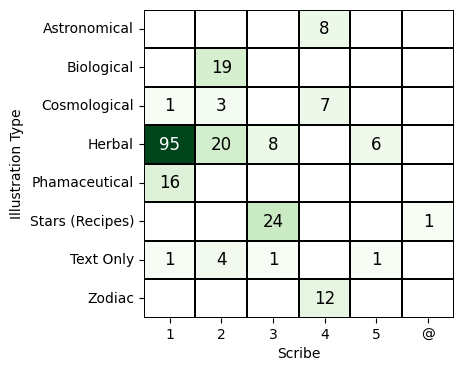

In [26]:
corpus_all = Corpus(f"VMS All", transliteration)
data = corpus_all.folios_df()[['folio','illustration','fagin_davis_scribe']]

label_dict = label_dict = {'A':'Astronomical',
              'B': 'Biological',
              'C': 'Cosmological',
              'H': 'Herbal',
              'P': 'Phamaceutical',
              'S': 'Stars (Recipes)',
              'T': 'Text Only',
              'Z': 'Zodiac'}

plot_scribes_and_topics_heatmap(data, 'Greens', label_dict, 'voynich_data/outputs/F_Folios_by_Scribe_and_Illustration_Type.png')


## Creating Study Corpus

This corpus will isolate Scribe 1 from the Herbal pages and only include unambigous tokens from paragraphs, excluding the last token in a paragraph

In [8]:
corpus = Corpus(f"Study Corpus for Positional Tokens Analysis", transliteration, criteria = {
    'fagin_davis_scribes' : ['1'],
    'illustrations':'H',
    'unambiguous_token': True,
    'paragraph_end_token': False,
    'locus_generic_types': 'P'})

--------------------------------------------------------------------------------
Corpus: Study Corpus for Positional Tokens Analysis
	From Transliteration file 'voynich_data/standard_ivtff/ZL_N_ext_Eva_3a'
		Alphabet:'Eva-' (ZL),    Alphabet Version:2.0
		Transliteration Version: 2.0
Selection Criteria: {
    "fagin_davis_scribes": [
        "1"
    ],
    "illustrations": "H",
    "locus_generic_types": "P",
    "paragraph_end_token": false,
    "unambiguous_token": true
}
	Num folios : 		        95
	Num lines  : 		     1,223
	Num tokens : 		     7,660
	Num glyphs : 		    36,177
	Num Unique tokens: 	     2,355
	Num Unique glyphs: 	        67
--------------------------------------------------------------------------------


In [9]:
study_corpus_file = 'voynich_data/outputs/Study_Corpus_for_Positional_Tokens_Analysis.pkl'

In [10]:
corpus.save(study_corpus_file)

## List of Folios is Study Corpus

In [11]:
corpus.folios()

['f1v',
 'f2r',
 'f2v',
 'f3r',
 'f3v',
 'f4r',
 'f4v',
 'f5r',
 'f5v',
 'f6r',
 'f6v',
 'f7r',
 'f7v',
 'f8r',
 'f8v',
 'f9r',
 'f9v',
 'f10r',
 'f10v',
 'f11r',
 'f11v',
 'f13r',
 'f13v',
 'f14r',
 'f14v',
 'f15r',
 'f15v',
 'f16r',
 'f16v',
 'f17r',
 'f17v',
 'f18r',
 'f18v',
 'f19r',
 'f19v',
 'f20r',
 'f20v',
 'f21r',
 'f21v',
 'f22r',
 'f22v',
 'f23r',
 'f23v',
 'f24r',
 'f24v',
 'f25r',
 'f25v',
 'f27r',
 'f27v',
 'f28r',
 'f28v',
 'f29r',
 'f29v',
 'f30r',
 'f30v',
 'f32r',
 'f32v',
 'f35r',
 'f35v',
 'f36r',
 'f36v',
 'f37r',
 'f37v',
 'f38r',
 'f38v',
 'f42r',
 'f42v',
 'f44r',
 'f44v',
 'f45r',
 'f45v',
 'f47r',
 'f47v',
 'f49r',
 'f49v',
 'f51r',
 'f51v',
 'f52r',
 'f52v',
 'f53r',
 'f53v',
 'f54r',
 'f54v',
 'f56r',
 'f56v',
 'f87r',
 'f87v',
 'f90r1',
 'f90r2',
 'f90v2',
 'f90v1',
 'f93r',
 'f93v',
 'f96r',
 'f96v']

## Test of Reload

In [12]:
corpus_x = Corpus.from_file(study_corpus_file)

--------------------------------------------------------------------------------
Corpus: Study Corpus for Positional Tokens Analysis
	From Transliteration file 'voynich_data/standard_ivtff/ZL_N_ext_Eva_3a'
		Alphabet:'Eva-' (ZL),    Alphabet Version:2.0
		Transliteration Version: 2.0
Selection Criteria: {
    "fagin_davis_scribes": [
        "1"
    ],
    "illustrations": "H",
    "locus_generic_types": "P",
    "paragraph_end_token": false,
    "unambiguous_token": true
}
	Num folios : 		        95
	Num lines  : 		     1,223
	Num tokens : 		     7,660
	Num glyphs : 		    36,177
	Num Unique tokens: 	     2,355
	Num Unique glyphs: 	        67
--------------------------------------------------------------------------------
